# Data Preprocessing

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
#versions of libraries
print("Pandas version:", pd.__version__)
print("Numpy version:", np.__version__)
print("Matplotlib version:", plt.matplotlib.__version__)
print("Seaborn version:", sns.__version__)

Pandas version: 2.2.2
Numpy version: 2.0.2
Matplotlib version: 3.10.0
Seaborn version: 0.13.2


In [3]:
import sys
print("Python version:", sys.version)

Python version: 3.12.12 (main, Oct 10 2025, 08:52:57) [GCC 11.4.0]


In [4]:
data=pd.read_csv('/content/earthquake_alert_balanced_dataset.csv')
data.head()

,magnitude,depth,cdi,mmi,sig,alert
0,7.0,14.0,8.0,7.0,0.0,green
1,6.9,25.0,4.0,4.0,-33.0,green
2,7.0,579.0,3.0,3.0,-13.0,green
3,7.3,37.0,5.0,5.0,65.0,green
4,6.6,624.0,0.0,2.0,-98.0,green


In [5]:
data.describe()

,magnitude,depth,cdi,mmi,sig
count,1300.000000,1300.000000,1300.000000,1300.000000,1300.000000
mean,7.061008,50.321538,6.976154,6.939231,-9.749231
std,0.423738,104.348286,2.244875,1.354774,62.245214
min,6.500000,2.000000,0.000000,1.000000,-128.000000
25%,6.700000,12.000000,6.000000,6.000000,-54.000000
50%,7.000000,19.000000,8.000000,7.000000,-7.000000
75%,7.300000,38.000000,8.000000,8.000000,31.000000
max,8.600000,670.000000,9.000000,9.000000,127.000000


<Axes: xlabel='sig', ylabel='alert'>

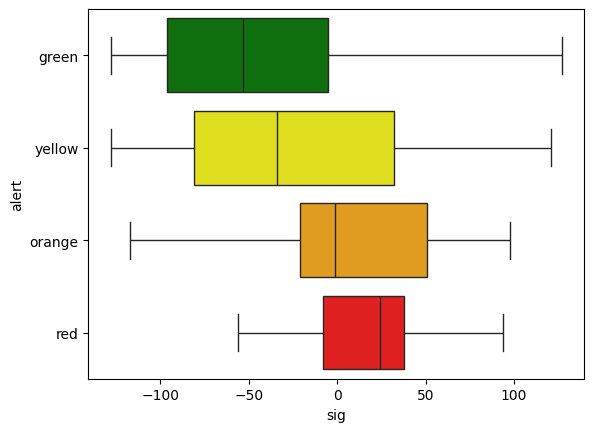

In [6]:
color_palette = {'green': 'green', 'orange': 'orange', 'red': 'red', 'yellow': 'yellow'}
sns.boxplot(x=data['sig'], y=data['alert'], hue=data['alert'], palette=color_palette, legend=False)

/tmp/ipython-input-3256285754.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x=data['depth'],y=data['alert'],palette=color_palette, legend=False)


<Axes: xlabel='depth', ylabel='alert'>

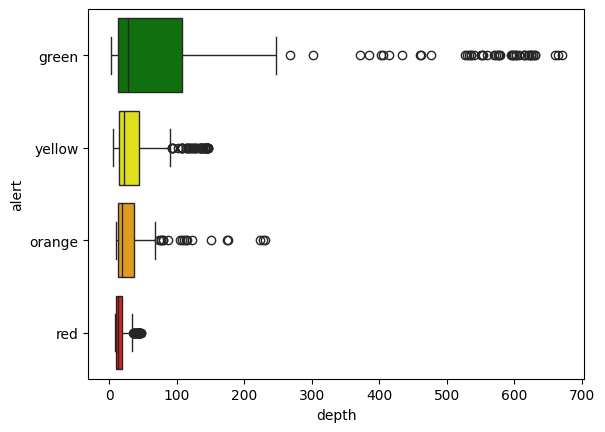

In [10]:
color_palette = {'green': 'green', 'orange': 'orange', 'red': 'red', 'yellow': 'yellow'}
sns.boxplot(x=data['depth'],y=data['alert'],palette=color_palette, legend=False)

In [11]:
data.shape

(1300, 6)

In [12]:
data = data.drop_duplicates()
data.shape

(1256, 6)

<Axes: xlabel='alert', ylabel='count'>

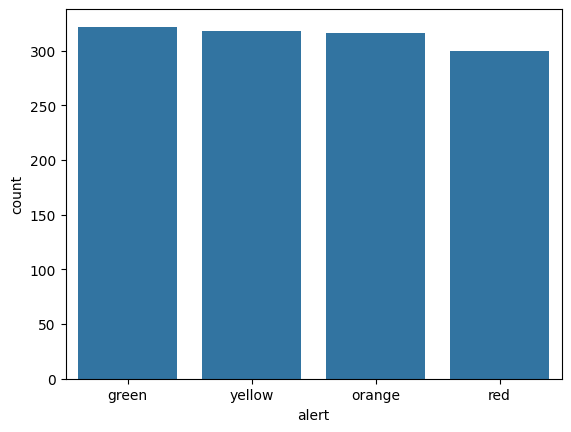

In [13]:
sns.countplot(x='alert',data=data)

In [14]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1256 entries, 0 to 1299
Data columns (total 6 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   magnitude  1256 non-null   float64
 1   depth      1256 non-null   float64
 2   cdi        1256 non-null   float64
 3   mmi        1256 non-null   float64
 4   sig        1256 non-null   float64
 5   alert      1256 non-null   object 
dtypes: float64(5), object(1)
memory usage: 68.7+ KB


In [15]:
X=data.drop('alert',axis=1)
y=data['alert']
X,y

(      magnitude  depth  cdi  mmi    sig
 0          7.00   14.0  8.0  7.0    0.0
 1          6.90   25.0  4.0  4.0  -33.0
 2          7.00  579.0  3.0  3.0  -13.0
 3          7.30   37.0  5.0  5.0   65.0
 4          6.60  624.0  0.0  2.0  -98.0
 ...         ...    ...  ...  ...    ...
 1295       6.87   11.0  9.0  7.0   13.0
 1296       7.85   93.0  8.0  6.0  -51.0
 1297       7.48  142.0  7.0  6.0  120.0
 1298       7.04   51.0  7.0  6.0 -115.0
 1299       6.50    9.0  9.0  8.0  -29.0
 
 [1256 rows x 5 columns],
 0        green
 1        green
 2        green
 3        green
 4        green
          ...  
 1295    yellow
 1296    yellow
 1297    yellow
 1298    yellow
 1299    yellow
 Name: alert, Length: 1256, dtype: object)

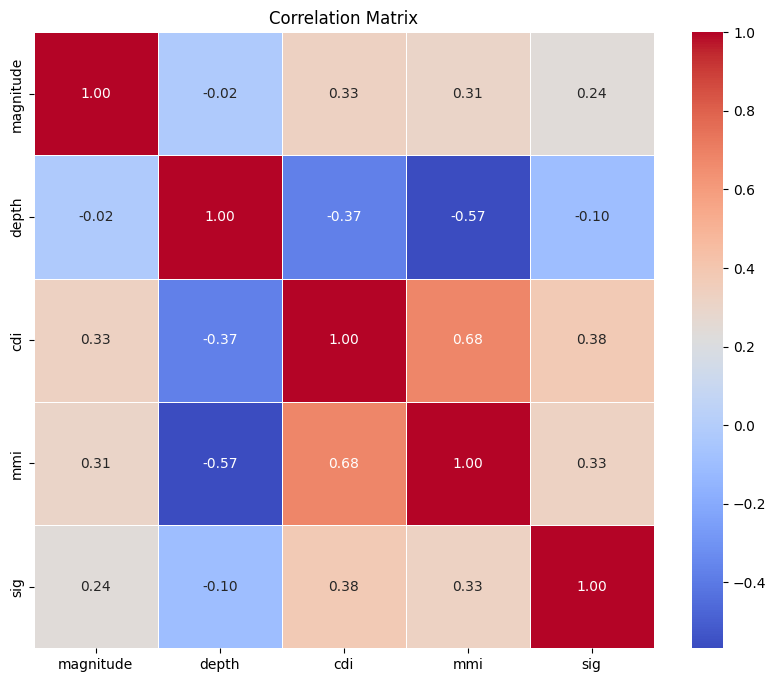

In [16]:
corr_matrix = X.corr()
plt.figure(figsize=(10, 8))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt=".2f", linewidths=0.5)
plt.title('Correlation Matrix')
plt.show()

In [17]:
from sklearn.preprocessing import LabelEncoder

le = LabelEncoder()
y_encoded = le.fit_transform(data['alert'])
y_encoded

array([0, 0, 0, ..., 3, 3, 3])

In [18]:
for i, class_label in enumerate(le.classes_):
    print(f"{class_label} → {i}")


green → 0
orange → 1
red → 2
yellow → 3


In [19]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)
X_scaled

array([[-1.43689245e-01, -3.52519257e-01,  4.63322547e-01,
         6.01506748e-02,  1.66882250e-01],
       [-3.80035097e-01, -2.48606177e-01, -1.31901473e+00,
        -2.14031285e+00, -3.62421048e-01],
       [-1.43689245e-01,  4.98483439e+00, -1.76459904e+00,
        -2.87380069e+00, -4.16311704e-02],
       ...,
       [ 9.90770842e-01,  8.56651126e-01,  1.77382292e-02,
        -6.73337166e-01,  2.09162151e+00],
       [-4.91509048e-02, -2.99344280e-03,  1.77382292e-02,
        -6.73337166e-01, -1.67765955e+00],
       [-1.32541850e+00, -3.99752475e-01,  9.08906866e-01,
         7.93638515e-01, -2.98263072e-01]])

# Model Traning

## Baseline Model Training

### Logistic regression

In [20]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, confusion_matrix


In [21]:
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y_encoded, test_size=0.2, random_state=42, stratify=y_encoded)

In [22]:
log_reg = LogisticRegression(multi_class="multinomial", solver="lbfgs", max_iter=1000, class_weight="balanced")
log_reg.fit(X_train, y_train)

/usr/local/lib/python3.12/dist-packages/sklearn/linear_model/_logistic.py:1247: FutureWarning: 'multi_class' was deprecated in version 1.5 and will be removed in 1.7. From then on, it will always use 'multinomial'. Leave it to its default value to avoid this warning.
  warnings.warn(


LogisticRegression(class_weight='balanced', max_iter=1000,
                   multi_class='multinomial')

In [23]:
log_pred = log_reg.predict(X_test)
log_pred

array([2, 2, 3, 2, 2, 1, 0, 3, 1, 2, 1, 0, 1, 2, 0, 3, 2, 1, 2, 2, 0, 1,
       0, 2, 2, 1, 3, 0, 0, 3, 3, 3, 2, 0, 0, 2, 1, 0, 0, 0, 0, 0, 1, 0,
       0, 1, 2, 0, 1, 1, 1, 2, 2, 3, 0, 3, 0, 2, 0, 2, 2, 3, 3, 1, 3, 3,
       3, 1, 0, 1, 3, 0, 2, 0, 3, 3, 1, 3, 2, 2, 3, 1, 2, 0, 3, 0, 1, 0,
       0, 1, 2, 3, 0, 3, 3, 3, 2, 0, 0, 2, 2, 3, 2, 2, 3, 3, 1, 3, 2, 0,
       2, 2, 2, 3, 3, 0, 0, 2, 3, 3, 1, 1, 3, 2, 3, 0, 0, 2, 2, 3, 1, 2,
       1, 1, 3, 3, 1, 0, 1, 1, 2, 1, 1, 0, 2, 0, 2, 3, 3, 2, 1, 2, 2, 1,
       0, 2, 1, 3, 2, 1, 3, 3, 2, 1, 3, 2, 2, 1, 2, 3, 2, 2, 1, 2, 1, 2,
       0, 3, 1, 2, 0, 0, 2, 0, 0, 3, 2, 2, 1, 3, 1, 1, 2, 3, 0, 3, 0, 1,
       3, 1, 0, 2, 0, 2, 3, 2, 3, 0, 3, 3, 0, 2, 2, 1, 0, 2, 0, 0, 0, 3,
       2, 3, 3, 2, 3, 1, 0, 3, 0, 3, 1, 2, 2, 1, 1, 1, 0, 2, 3, 3, 3, 0,
       1, 0, 3, 3, 3, 2, 3, 1, 2, 0])

In [24]:
from sklearn.metrics import mean_absolute_error
mae = mean_absolute_error(y_test, log_pred)
mae

0.6468253968253969

In [25]:
mat = confusion_matrix(y_test, log_pred)
mat

array([[51,  1,  1, 12],
       [ 0, 28, 16, 19],
       [ 0, 10, 50,  0],
       [ 9, 14,  5, 36]])

In [26]:
print("\nClassification Report:\n", classification_report(y_test, log_pred))


Classification Report:
               precision    recall  f1-score   support

           0       0.85      0.78      0.82        65
           1       0.53      0.44      0.48        63
           2       0.69      0.83      0.76        60
           3       0.54      0.56      0.55        64

    accuracy                           0.65       252
   macro avg       0.65      0.66      0.65       252
weighted avg       0.65      0.65      0.65       252



### Decision Tree

In [27]:
from sklearn import tree
clftree=tree.DecisionTreeClassifier()

In [28]:
clftree.fit(X_train,y_train)

DecisionTreeClassifier()

In [29]:
clftree_pred= clftree.predict(X_test)
clftree_pred

array([2, 2, 3, 3, 2, 1, 0, 3, 3, 1, 3, 0, 1, 2, 0, 3, 2, 1, 2, 2, 0, 1,
       0, 1, 2, 1, 3, 0, 0, 3, 3, 0, 2, 0, 0, 2, 1, 3, 0, 0, 0, 0, 3, 0,
       0, 1, 2, 0, 3, 1, 2, 2, 2, 1, 0, 3, 3, 1, 3, 2, 2, 3, 3, 2, 3, 1,
       3, 1, 0, 1, 1, 0, 2, 0, 1, 3, 3, 0, 2, 2, 1, 1, 2, 0, 3, 0, 1, 3,
       0, 2, 1, 3, 0, 3, 3, 1, 2, 0, 3, 1, 3, 3, 2, 1, 3, 1, 2, 3, 3, 0,
       2, 3, 2, 1, 3, 0, 0, 1, 3, 3, 1, 2, 3, 2, 3, 0, 0, 1, 2, 3, 0, 2,
       3, 1, 3, 0, 1, 0, 0, 1, 2, 1, 2, 0, 2, 3, 2, 0, 1, 2, 3, 2, 2, 1,
       0, 2, 1, 0, 1, 3, 0, 1, 1, 3, 3, 2, 1, 2, 2, 3, 2, 2, 1, 2, 3, 1,
       0, 3, 1, 2, 0, 0, 2, 0, 0, 3, 2, 2, 1, 3, 3, 3, 3, 1, 0, 3, 0, 1,
       3, 2, 0, 2, 0, 2, 0, 2, 3, 0, 3, 1, 3, 1, 2, 2, 3, 2, 0, 0, 3, 3,
       2, 3, 3, 2, 1, 1, 3, 3, 3, 1, 1, 1, 1, 1, 2, 1, 0, 2, 0, 1, 3, 0,
       2, 0, 3, 3, 3, 2, 1, 1, 2, 0])

In [30]:
from sklearn.metrics import mean_absolute_error
mae = mean_absolute_error(y_test, clftree_pred)
mae

0.2896825396825397

In [31]:
mat = confusion_matrix(y_test, clftree_pred)
mat

array([[50,  2,  1, 12],
       [ 4, 55,  1,  3],
       [ 0,  0, 59,  1],
       [ 5,  2,  2, 55]])

In [32]:
print("\nClassification Report:\n", classification_report(y_test, clftree_pred))


Classification Report:
               precision    recall  f1-score   support

           0       0.85      0.77      0.81        65
           1       0.93      0.87      0.90        63
           2       0.94      0.98      0.96        60
           3       0.77      0.86      0.81        64

    accuracy                           0.87       252
   macro avg       0.87      0.87      0.87       252
weighted avg       0.87      0.87      0.87       252



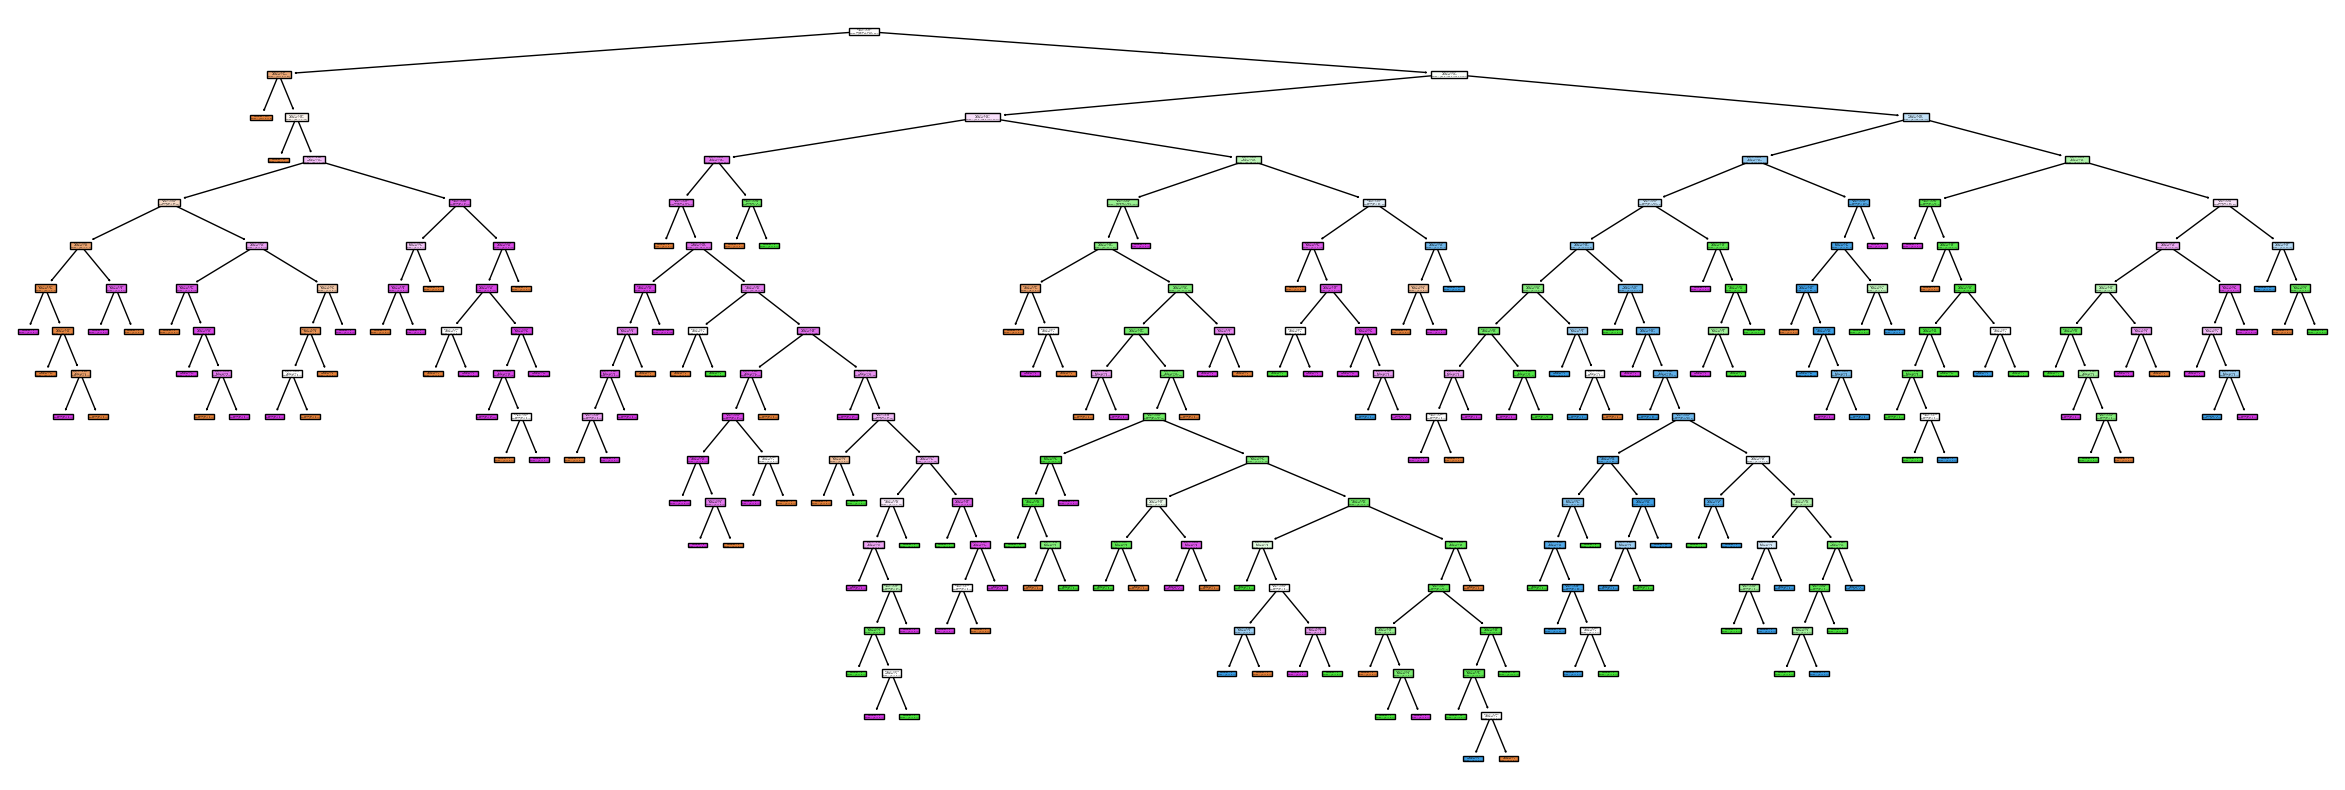

In [33]:
fig=plt.figure(figsize=(30,10))
tree.plot_tree(clftree,filled=True)
plt.show()

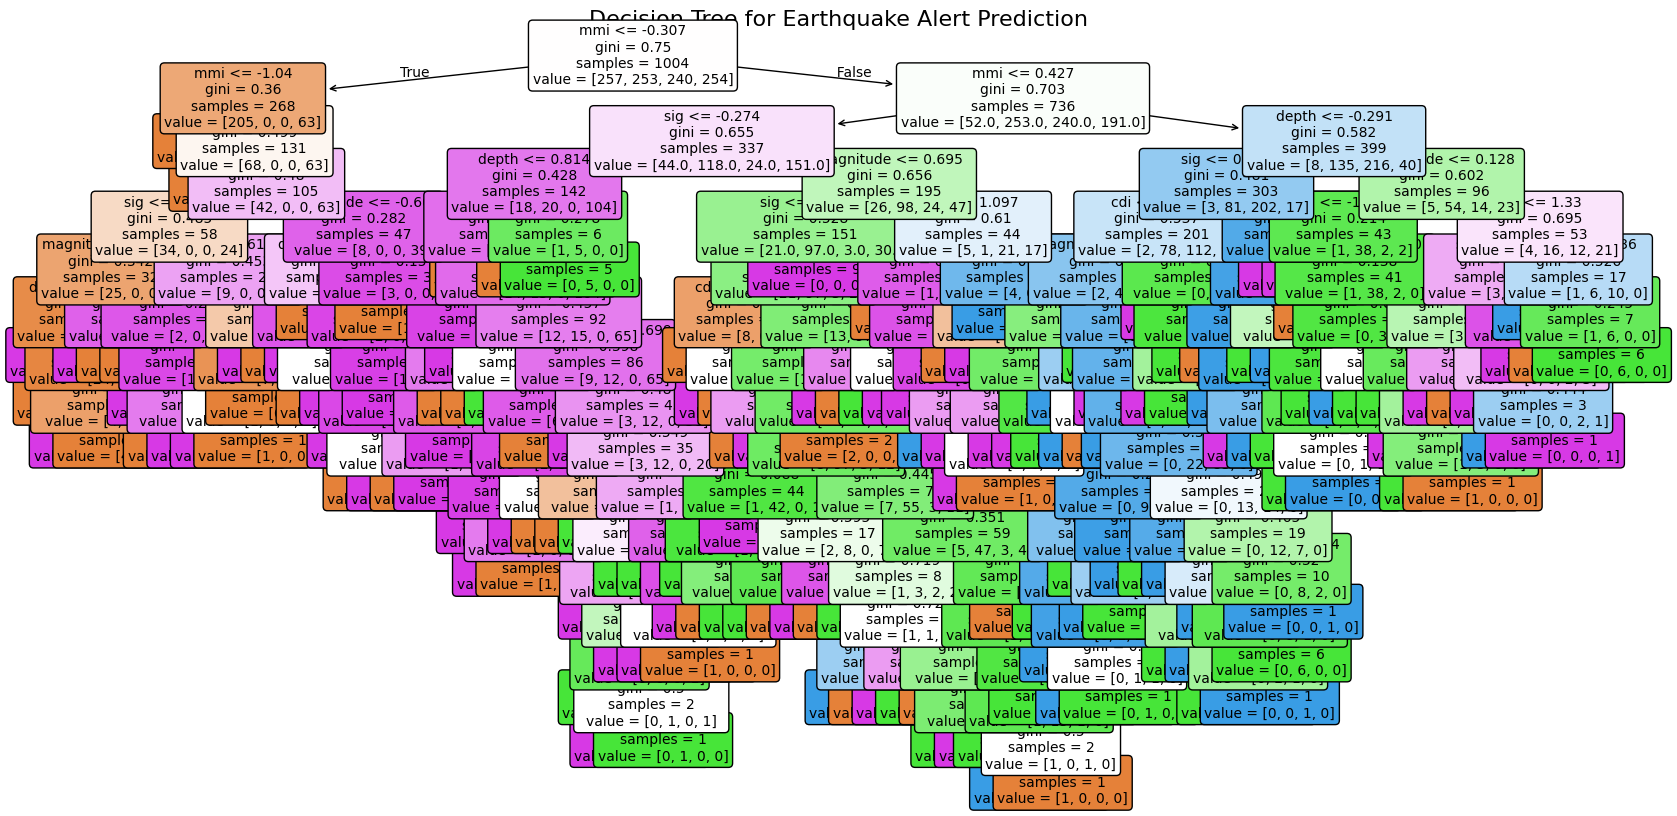

In [34]:

import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier, plot_tree
import matplotlib.pyplot as plt

plt.figure(figsize=(20,10))
plot_tree(
    clftree,
    feature_names=X.columns,
    #class_names=clftree.classes_,
    filled=True,
    rounded=True,
    fontsize=10
)
plt.title("Decision Tree for Earthquake Alert Prediction", fontsize=16)
plt.show()


# Advanced Model Training

## Random Forest

In [35]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, confusion_matrix
import matplotlib.pyplot as plt



In [36]:

rf_clf = RandomForestClassifier(
    n_estimators=200,        # number of trees in the forest
    max_depth=None,          # let trees grow fully (can tune later)
    class_weight="balanced", # handle class imbalance
    random_state=42,
    n_jobs=-1                # use all CPU cores for speed
)
rf_clf.fit(X_train, y_train)


RandomForestClassifier(class_weight='balanced', n_estimators=200, n_jobs=-1,
                       random_state=42)

In [37]:
rf_pred = rf_clf.predict(X_test)
rf_pred

array([2, 1, 3, 3, 2, 1, 3, 3, 3, 1, 3, 0, 1, 2, 0, 3, 2, 1, 2, 2, 0, 1,
       0, 1, 2, 1, 3, 0, 0, 3, 1, 3, 2, 0, 0, 2, 1, 0, 0, 0, 0, 0, 3, 0,
       0, 1, 2, 0, 3, 1, 2, 2, 2, 1, 0, 3, 0, 1, 0, 2, 2, 3, 3, 2, 3, 1,
       3, 1, 0, 1, 1, 0, 2, 0, 1, 1, 3, 3, 2, 2, 1, 1, 2, 0, 3, 0, 1, 3,
       0, 2, 1, 3, 0, 3, 3, 1, 2, 0, 3, 1, 3, 3, 2, 1, 3, 1, 2, 3, 2, 0,
       2, 3, 2, 1, 3, 0, 0, 1, 3, 3, 1, 2, 3, 2, 3, 0, 0, 1, 2, 3, 1, 2,
       3, 1, 3, 1, 1, 0, 0, 1, 2, 1, 2, 0, 2, 3, 2, 3, 1, 2, 3, 2, 2, 1,
       0, 2, 1, 1, 2, 3, 3, 1, 1, 3, 3, 2, 1, 2, 2, 3, 2, 2, 1, 2, 3, 1,
       0, 3, 1, 2, 0, 0, 2, 0, 0, 3, 2, 2, 1, 3, 3, 3, 3, 1, 0, 3, 0, 1,
       3, 2, 0, 2, 0, 2, 1, 2, 0, 0, 0, 1, 0, 1, 2, 2, 3, 2, 0, 0, 3, 3,
       2, 3, 3, 2, 1, 1, 3, 3, 3, 0, 1, 1, 1, 1, 2, 1, 0, 2, 0, 3, 3, 0,
       2, 0, 3, 3, 3, 2, 3, 1, 2, 0])

In [38]:
print("Confusion Matrix:\n", confusion_matrix(y_test, rf_pred))
print("\nClassification Report:\n", classification_report(y_test, rf_pred))

Confusion Matrix:
 [[55  0  1  9]
 [ 0 61  1  1]
 [ 0  0 60  0]
 [ 2  1  2 59]]

Classification Report:
               precision    recall  f1-score   support

           0       0.96      0.85      0.90        65
           1       0.98      0.97      0.98        63
           2       0.94      1.00      0.97        60
           3       0.86      0.92      0.89        64

    accuracy                           0.93       252
   macro avg       0.94      0.93      0.93       252
weighted avg       0.94      0.93      0.93       252



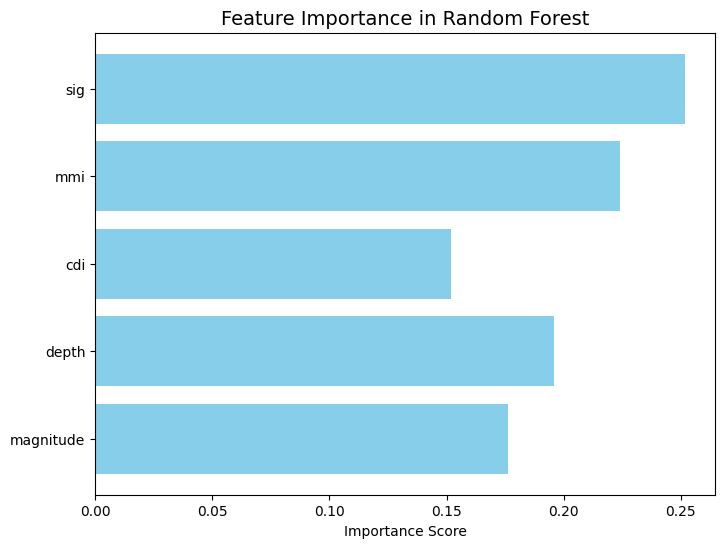

In [39]:
importances = rf_clf.feature_importances_
plt.figure(figsize=(8,6))
plt.barh(X.columns, importances, color="skyblue")
plt.title("Feature Importance in Random Forest", fontsize=14)
plt.xlabel("Importance Score")
plt.show()

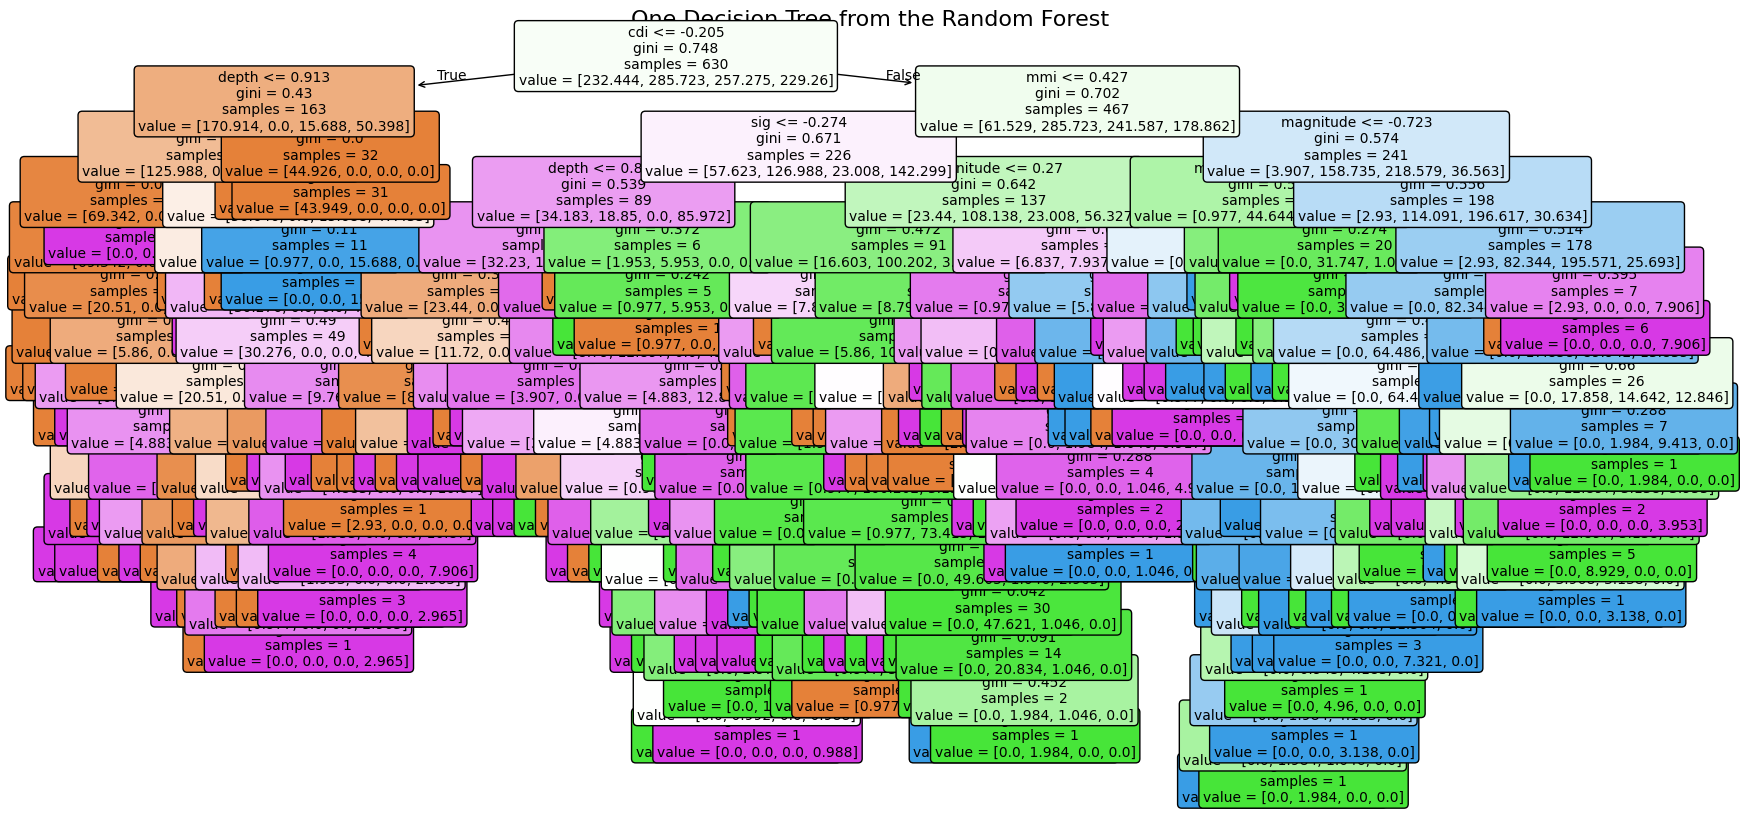

In [40]:
estimator = rf_clf.estimators_[0]

plt.figure(figsize=(20,10))
tree.plot_tree(
    estimator,
    feature_names=X.columns,
    #class_names=rf_clf.classes_,
    filled=True,
    rounded=True,
    fontsize=10
)
plt.title("One Decision Tree from the Random Forest", fontsize=16)
plt.show()


## Gradient Boosting

In [41]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.metrics import classification_report, confusion_matrix
import matplotlib.pyplot as plt


gb_clf = GradientBoostingClassifier(
    n_estimators=300,       # number of boosting stages (trees)
    learning_rate=0.05,     # step size shrinkage
    max_depth=None,            # depth of individual trees
    random_state=42
)
gb_clf.fit(X_train, y_train)


GradientBoostingClassifier(learning_rate=0.05, max_depth=None, n_estimators=300,
                           random_state=42)

In [42]:
gb_pred = gb_clf.predict(X_test)
gb_pred

array([2, 2, 3, 3, 2, 1, 0, 0, 3, 1, 1, 0, 1, 2, 0, 3, 2, 1, 1, 2, 0, 1,
       0, 1, 2, 1, 3, 0, 0, 3, 1, 0, 2, 0, 0, 2, 1, 0, 0, 0, 0, 0, 3, 0,
       0, 1, 2, 0, 3, 1, 2, 2, 2, 1, 0, 3, 3, 1, 0, 2, 2, 3, 3, 3, 3, 1,
       3, 1, 0, 1, 1, 0, 2, 0, 1, 1, 3, 3, 2, 2, 1, 1, 2, 0, 3, 0, 1, 3,
       0, 2, 1, 3, 0, 3, 3, 1, 2, 0, 3, 1, 3, 3, 2, 1, 3, 1, 2, 3, 1, 0,
       2, 3, 3, 1, 3, 0, 0, 1, 3, 3, 1, 2, 3, 2, 3, 0, 0, 1, 1, 3, 1, 2,
       3, 1, 3, 0, 1, 0, 0, 1, 2, 1, 2, 0, 2, 3, 2, 0, 1, 2, 3, 2, 2, 1,
       0, 2, 1, 1, 1, 3, 3, 1, 1, 3, 3, 2, 1, 2, 2, 1, 1, 2, 1, 2, 3, 1,
       0, 3, 1, 2, 0, 0, 2, 0, 0, 0, 1, 2, 1, 3, 3, 2, 3, 1, 0, 3, 0, 1,
       3, 2, 0, 2, 0, 2, 0, 2, 0, 0, 0, 1, 0, 1, 2, 2, 3, 2, 0, 0, 3, 3,
       2, 3, 3, 2, 1, 1, 3, 3, 3, 3, 1, 1, 1, 1, 2, 1, 0, 2, 0, 3, 3, 0,
       2, 0, 3, 3, 3, 2, 3, 1, 2, 0])

In [43]:
print("Confusion Matrix:\n", confusion_matrix(y_test, gb_pred))
print("\nClassification Report:\n", classification_report(y_test, gb_pred))


Confusion Matrix:
 [[57  0  0  8]
 [ 2 59  1  1]
 [ 0  4 56  0]
 [ 3  4  1 56]]

Classification Report:
               precision    recall  f1-score   support

           0       0.92      0.88      0.90        65
           1       0.88      0.94      0.91        63
           2       0.97      0.93      0.95        60
           3       0.86      0.88      0.87        64

    accuracy                           0.90       252
   macro avg       0.91      0.91      0.91       252
weighted avg       0.91      0.90      0.90       252



## XGBOOST

In [44]:
from xgboost import XGBClassifier, plot_importance

xgb_clf = XGBClassifier(
    n_estimators=300,        # number of boosting rounds
    learning_rate=0.05,      # step size shrinkage
    max_depth=None,             # depth of trees
    subsample=0.8,           # subsample ratio of training instances
    colsample_bytree=0.8,    # subsample ratio of columns per tree
    objective="multi:softmax", # multi-class classification
    num_class=len(y.unique()), # number of classes
    random_state=42,
    use_label_encoder=True,
    eval_metric="mlogloss"
)
xgb_clf.fit(X_train, y_train)

/usr/local/lib/python3.12/dist-packages/xgboost/training.py:199: UserWarning: [10:18:21] WARNING: /workspace/src/learner.cc:790: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)


XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=0.8, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric='mlogloss',
              feature_types=None, feature_weights=None, gamma=None,
              grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=0.05, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=None, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=300, n_jobs=None, num_class=4, ...)

In [45]:
XG_pred = xgb_clf.predict(X_test)
XG_pred

array([2, 1, 3, 3, 2, 1, 3, 0, 3, 1, 3, 0, 1, 2, 0, 3, 2, 1, 1, 2, 0, 1,
       0, 1, 2, 1, 3, 0, 0, 3, 1, 0, 2, 0, 0, 2, 1, 0, 0, 0, 0, 0, 3, 0,
       0, 1, 2, 0, 3, 1, 2, 2, 2, 1, 0, 3, 0, 1, 0, 2, 2, 3, 3, 3, 3, 1,
       3, 1, 0, 1, 1, 0, 2, 0, 1, 1, 3, 3, 2, 2, 1, 1, 2, 0, 3, 0, 1, 3,
       0, 2, 1, 3, 0, 3, 3, 1, 2, 0, 3, 1, 3, 3, 2, 1, 3, 1, 2, 3, 2, 0,
       2, 3, 2, 1, 3, 0, 0, 1, 3, 3, 1, 2, 3, 2, 3, 0, 0, 1, 2, 3, 3, 2,
       3, 1, 3, 1, 1, 0, 0, 1, 2, 1, 2, 0, 2, 3, 2, 0, 1, 2, 3, 2, 2, 1,
       0, 2, 1, 1, 2, 3, 3, 1, 1, 3, 3, 2, 1, 2, 2, 3, 2, 2, 1, 2, 3, 1,
       0, 3, 1, 2, 0, 0, 2, 0, 0, 0, 2, 2, 1, 3, 3, 1, 3, 1, 0, 3, 0, 1,
       3, 2, 3, 2, 0, 2, 1, 2, 0, 0, 0, 1, 0, 1, 2, 2, 3, 2, 0, 0, 3, 3,
       2, 3, 3, 2, 1, 1, 3, 3, 3, 0, 1, 1, 1, 1, 2, 1, 0, 2, 0, 3, 3, 0,
       2, 0, 3, 3, 3, 2, 3, 1, 2, 0], dtype=int32)

In [46]:
print("Confusion Matrix:\n", confusion_matrix(y_test, XG_pred))
print("\nClassification Report:\n", classification_report(y_test, XG_pred))

Confusion Matrix:
 [[59  0  1  5]
 [ 0 60  1  2]
 [ 0  1 59  0]
 [ 1  2  1 60]]

Classification Report:
               precision    recall  f1-score   support

           0       0.98      0.91      0.94        65
           1       0.95      0.95      0.95        63
           2       0.95      0.98      0.97        60
           3       0.90      0.94      0.92        64

    accuracy                           0.94       252
   macro avg       0.95      0.95      0.94       252
weighted avg       0.95      0.94      0.94       252



<Figure size 800x600 with 0 Axes>

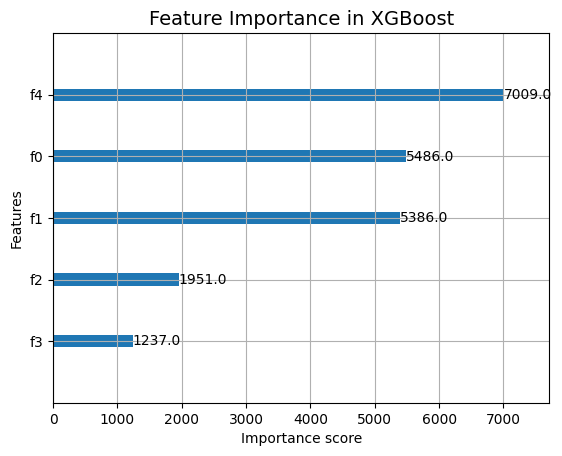

In [48]:
plt.figure(figsize=(8,6))
plot_importance(xgb_clf, importance_type="weight")
plt.title("Feature Importance in XGBoost", fontsize=14)
plt.show()

# Hyperparameter Tuning

## Random Forest

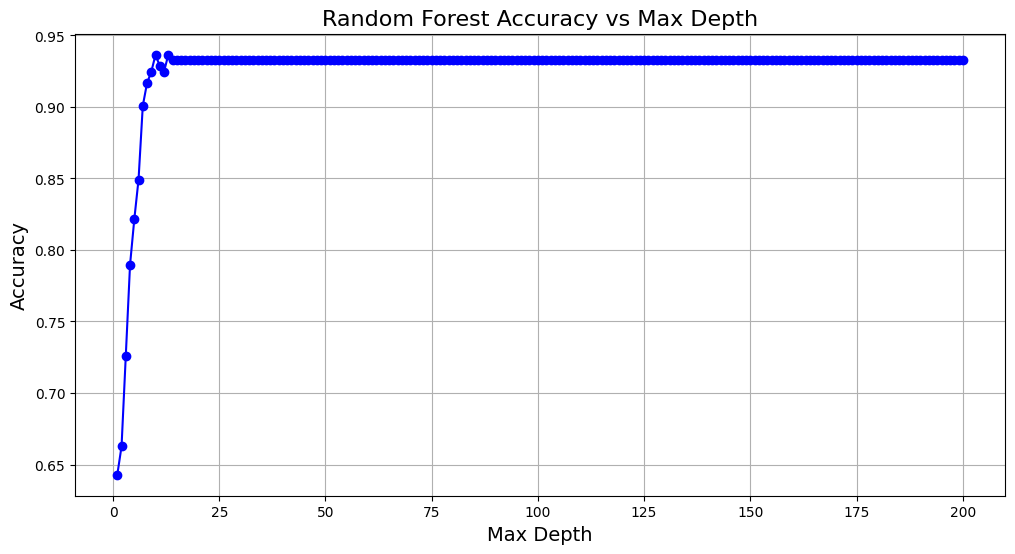

In [49]:


from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score


depths = range(1, 201)
accuracies = []

for d in depths:
    rf_clf = RandomForestClassifier(
        n_estimators=200,
        max_depth=d,
        class_weight="balanced",
        random_state=42,
        n_jobs=-1
    )
    rf_clf.fit(X_train, y_train)
    y_pred = rf_clf.predict(X_test)
    acc = accuracy_score(y_test, y_pred)
    accuracies.append(acc)


plt.figure(figsize=(12,6))
plt.plot(depths, accuracies, marker="o", linestyle="-", color="blue")
plt.title("Random Forest Accuracy vs Max Depth", fontsize=16)
plt.xlabel("Max Depth", fontsize=14)
plt.ylabel("Accuracy", fontsize=14)
plt.grid(True)
plt.show()

In [50]:
best_acc = max(accuracies)
best_depth = depths[accuracies.index(best_acc)]
print(f"Best accuracy: {best_acc:.4f} at max_depth = {best_depth}")


Best accuracy: 0.9365 at max_depth = 10


Best accuracy: 0.9444 at n_estimators = 80


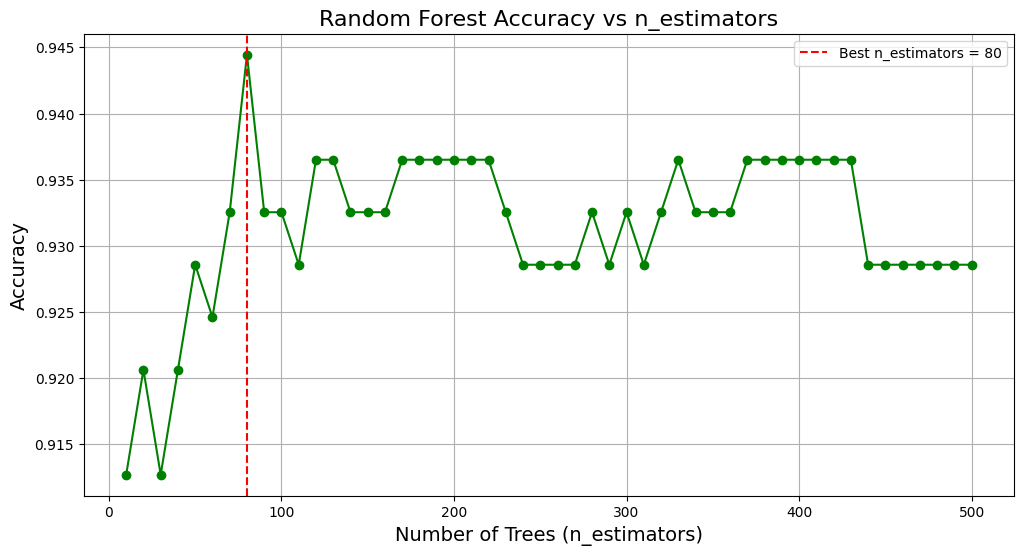

In [51]:
estimators = range(10, 501, 10)
accuracies = []

for n in estimators:
    rf_clf = RandomForestClassifier(
        n_estimators=n,
        max_depth=10,
        class_weight="balanced",
        random_state=42,
        n_jobs=-1
    )
    rf_clf.fit(X_train, y_train)
    y_pred = rf_clf.predict(X_test)
    acc = accuracy_score(y_test, y_pred)
    accuracies.append(acc)

# 6. Find best n_estimators
best_acc = max(accuracies)
best_n = estimators[accuracies.index(best_acc)]
print(f"Best accuracy: {best_acc:.4f} at n_estimators = {best_n}")

# 7. Plot accuracy vs n_estimators
plt.figure(figsize=(12,6))
plt.plot(estimators, accuracies, marker="o", linestyle="-", color="green")
plt.axvline(best_n, color="red", linestyle="--", label=f"Best n_estimators = {best_n}")
plt.title("Random Forest Accuracy vs n_estimators", fontsize=16)
plt.xlabel("Number of Trees (n_estimators)", fontsize=14)
plt.ylabel("Accuracy", fontsize=14)
plt.legend()
plt.grid(True)
plt.show()

In [52]:
rf_clf = RandomForestClassifier(
    n_estimators=80,
    max_depth=10,
    class_weight="balanced",
    random_state=42,
    n_jobs=-1
)
rf_clf.fit(X_train, y_train)

RandomForestClassifier(class_weight='balanced', max_depth=10, n_estimators=80,
                       n_jobs=-1, random_state=42)

In [53]:
rf_pred = rf_clf.predict(X_test)
rf_pred

array([2, 1, 3, 3, 2, 1, 3, 0, 3, 1, 3, 0, 1, 2, 0, 3, 2, 1, 2, 2, 0, 1,
       0, 1, 2, 1, 3, 0, 0, 3, 1, 0, 2, 0, 0, 2, 1, 0, 0, 0, 0, 0, 3, 0,
       0, 1, 2, 0, 3, 1, 2, 2, 2, 1, 0, 3, 0, 1, 0, 2, 2, 3, 3, 3, 3, 1,
       3, 1, 0, 1, 1, 0, 2, 0, 1, 1, 3, 3, 2, 2, 1, 1, 2, 0, 3, 0, 1, 3,
       0, 2, 1, 3, 0, 1, 3, 1, 2, 0, 3, 1, 3, 3, 2, 1, 3, 1, 2, 3, 2, 0,
       2, 3, 2, 1, 3, 0, 0, 1, 3, 3, 1, 2, 3, 2, 3, 0, 0, 1, 2, 3, 1, 2,
       3, 1, 3, 1, 1, 0, 0, 1, 2, 1, 2, 0, 2, 3, 2, 3, 1, 2, 1, 2, 2, 1,
       0, 2, 1, 1, 2, 3, 3, 1, 1, 3, 3, 2, 1, 2, 2, 1, 2, 2, 1, 2, 3, 1,
       0, 3, 1, 2, 0, 0, 2, 0, 0, 0, 2, 2, 1, 3, 3, 3, 3, 1, 0, 3, 0, 1,
       3, 2, 0, 2, 0, 2, 1, 2, 0, 0, 0, 1, 0, 1, 2, 2, 3, 2, 0, 0, 3, 3,
       2, 3, 3, 2, 1, 1, 3, 3, 3, 0, 1, 1, 1, 1, 2, 1, 0, 2, 0, 3, 3, 0,
       2, 0, 3, 3, 3, 2, 3, 1, 2, 0])

In [54]:
print("Confusion Matrix:\n", confusion_matrix(y_test, rf_pred))
print("\nClassification Report:\n", classification_report(y_test, rf_pred))

Confusion Matrix:
 [[58  0  1  6]
 [ 0 62  1  0]
 [ 0  0 60  0]
 [ 2  3  1 58]]

Classification Report:
               precision    recall  f1-score   support

           0       0.97      0.89      0.93        65
           1       0.95      0.98      0.97        63
           2       0.95      1.00      0.98        60
           3       0.91      0.91      0.91        64

    accuracy                           0.94       252
   macro avg       0.94      0.95      0.94       252
weighted avg       0.94      0.94      0.94       252



## Gradient Boost

Best accuracy: 0.9524 at max_depth = 8


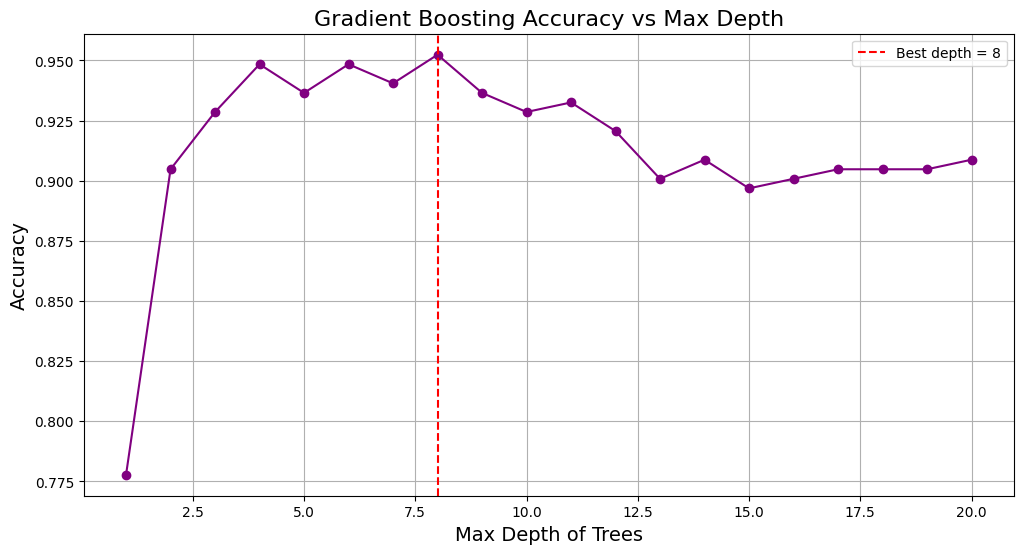

In [55]:
depths = range(1, 21)
accuracies = []

for d in depths:
    gb_clf = GradientBoostingClassifier(
        n_estimators=300,
        learning_rate=0.05,
        max_depth=d,
        random_state=42
    )
    gb_clf.fit(X_train, y_train)
    y_pred = gb_clf.predict(X_test)
    acc = accuracy_score(y_test, y_pred)
    accuracies.append(acc)


best_acc = max(accuracies)
best_depth = depths[accuracies.index(best_acc)]
print(f"Best accuracy: {best_acc:.4f} at max_depth = {best_depth}")

plt.figure(figsize=(12,6))
plt.plot(depths, accuracies, marker="o", linestyle="-", color="purple")
plt.axvline(best_depth, color="red", linestyle="--", label=f"Best depth = {best_depth}")
plt.title("Gradient Boosting Accuracy vs Max Depth", fontsize=16)
plt.xlabel("Max Depth of Trees", fontsize=14)
plt.ylabel("Accuracy", fontsize=14)
plt.legend()
plt.grid(True)
plt.show()


Best accuracy: 0.9524 at n_estimators = 300


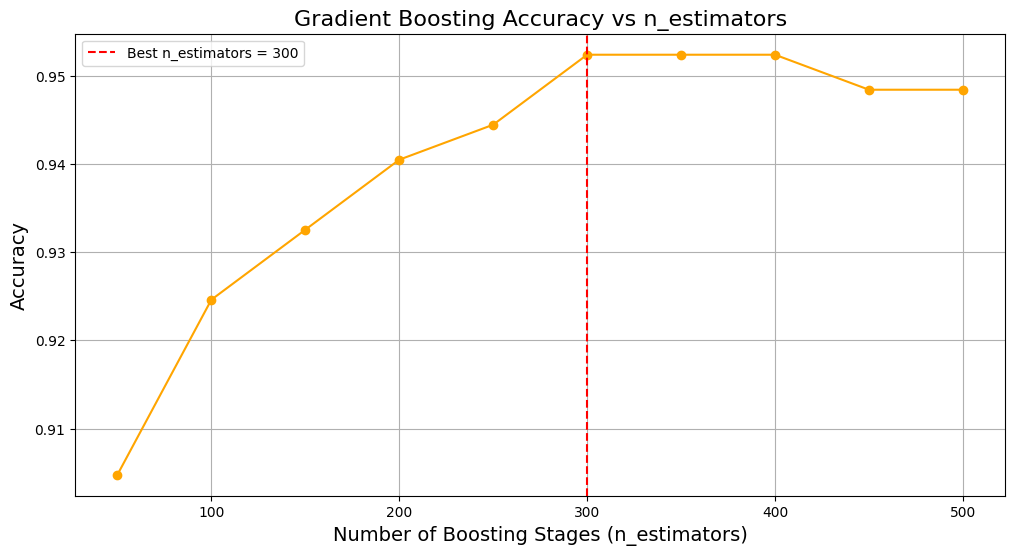

In [56]:
estimators = range(50, 501, 50)
accuracies = []

for n in estimators:
    gb_clf = GradientBoostingClassifier(
        n_estimators=n,
        learning_rate=0.05,
        max_depth=8,
        random_state=42
    )
    gb_clf.fit(X_train, y_train)
    y_pred = gb_clf.predict(X_test)
    acc = accuracy_score(y_test, y_pred)
    accuracies.append(acc)

best_acc = max(accuracies)
best_n = estimators[accuracies.index(best_acc)]
print(f"Best accuracy: {best_acc:.4f} at n_estimators = {best_n}")

plt.figure(figsize=(12,6))
plt.plot(estimators, accuracies, marker="o", linestyle="-", color="orange")
plt.axvline(best_n, color="red", linestyle="--", label=f"Best n_estimators = {best_n}")
plt.title("Gradient Boosting Accuracy vs n_estimators", fontsize=16)
plt.xlabel("Number of Boosting Stages (n_estimators)", fontsize=14)
plt.ylabel("Accuracy", fontsize=14)
plt.legend()
plt.grid(True)
plt.show()


In [57]:
gb_clf = GradientBoostingClassifier(
    n_estimators=300,
    learning_rate=0.05,
    max_depth=8,
    random_state=42
)
gb_clf.fit(X_train, y_train)

GradientBoostingClassifier(learning_rate=0.05, max_depth=8, n_estimators=300,
                           random_state=42)

In [58]:
gb_pred = gb_clf.predict(X_test)
gb_pred

array([2, 2, 3, 3, 2, 1, 3, 0, 3, 1, 3, 0, 1, 2, 0, 3, 2, 1, 1, 2, 0, 1,
       0, 1, 2, 1, 3, 0, 0, 3, 1, 0, 2, 0, 0, 2, 1, 0, 0, 0, 0, 0, 3, 0,
       0, 1, 2, 0, 3, 1, 2, 2, 2, 1, 0, 3, 0, 1, 0, 2, 2, 3, 3, 3, 3, 1,
       3, 1, 0, 1, 1, 0, 2, 0, 1, 1, 3, 3, 2, 2, 1, 1, 2, 0, 3, 0, 1, 3,
       0, 2, 1, 3, 0, 3, 3, 1, 2, 0, 3, 1, 3, 3, 2, 1, 3, 1, 2, 3, 2, 0,
       2, 3, 2, 1, 3, 0, 0, 1, 3, 3, 1, 2, 0, 2, 3, 0, 0, 1, 2, 3, 1, 2,
       3, 1, 3, 1, 1, 0, 0, 1, 2, 1, 2, 0, 2, 3, 2, 0, 1, 2, 3, 2, 2, 1,
       0, 2, 1, 1, 2, 3, 3, 1, 1, 3, 3, 2, 1, 2, 2, 3, 2, 2, 1, 2, 3, 1,
       0, 3, 1, 2, 0, 0, 2, 0, 0, 0, 2, 2, 1, 3, 3, 3, 3, 1, 0, 3, 0, 1,
       3, 2, 3, 2, 0, 2, 1, 2, 0, 0, 0, 1, 0, 1, 2, 2, 3, 2, 0, 0, 3, 3,
       2, 3, 3, 2, 1, 1, 3, 3, 3, 0, 1, 1, 1, 1, 2, 1, 0, 2, 0, 3, 3, 0,
       2, 0, 3, 3, 3, 2, 3, 1, 2, 0])

In [59]:
print("Confusion Matrix:\n", confusion_matrix(y_test, gb_pred))
print("\nClassification Report:\n", classification_report(y_test, gb_pred))

Confusion Matrix:
 [[60  0  1  4]
 [ 0 60  2  1]
 [ 0  1 59  0]
 [ 1  1  1 61]]

Classification Report:
               precision    recall  f1-score   support

           0       0.98      0.92      0.95        65
           1       0.97      0.95      0.96        63
           2       0.94      0.98      0.96        60
           3       0.92      0.95      0.94        64

    accuracy                           0.95       252
   macro avg       0.95      0.95      0.95       252
weighted avg       0.95      0.95      0.95       252



## XG Boost

Best accuracy: 0.9444 at max_depth = 6


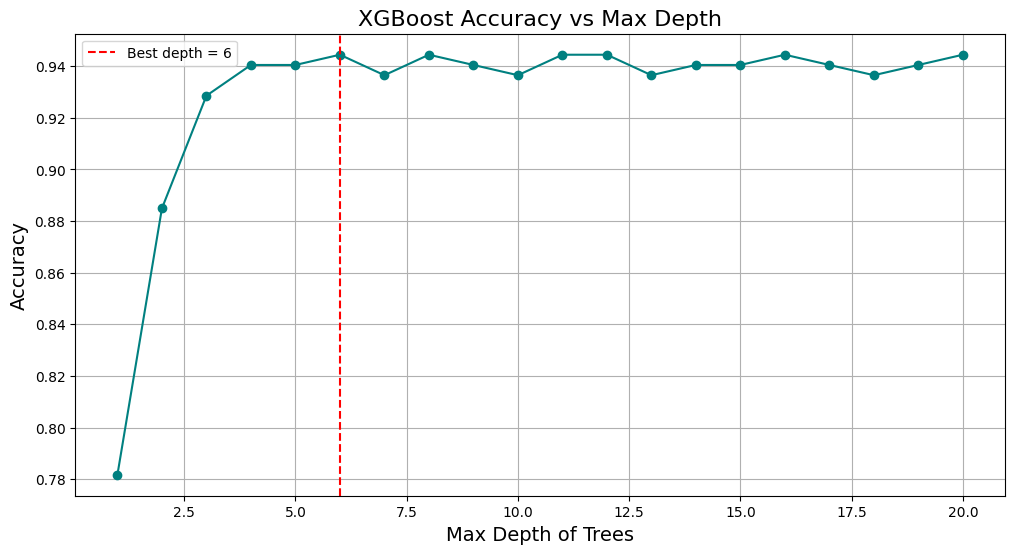

In [60]:
depths = range(1, 21)
accuracies = []

for d in depths:
    xgb_clf = XGBClassifier(
        n_estimators=300,
        learning_rate=0.05,
        max_depth=d,
        subsample=0.8,
        colsample_bytree=0.8,
        objective="multi:softmax",
        num_class=len(y.unique()),
        random_state=42,
        eval_metric="mlogloss"
    )
    xgb_clf.fit(X_train, y_train)
    y_pred = xgb_clf.predict(X_test)
    acc = accuracy_score(y_test, y_pred)
    accuracies.append(acc)


best_acc = max(accuracies)
best_depth = depths[accuracies.index(best_acc)]
print(f"Best accuracy: {best_acc:.4f} at max_depth = {best_depth}")


plt.figure(figsize=(12,6))
plt.plot(depths, accuracies, marker="o", linestyle="-", color="teal")
plt.axvline(best_depth, color="red", linestyle="--", label=f"Best depth = {best_depth}")
plt.title("XGBoost Accuracy vs Max Depth", fontsize=16)
plt.xlabel("Max Depth of Trees", fontsize=14)
plt.ylabel("Accuracy", fontsize=14)
plt.legend()
plt.grid(True)
plt.show()


Best accuracy: 0.9444 at n_estimators = 250


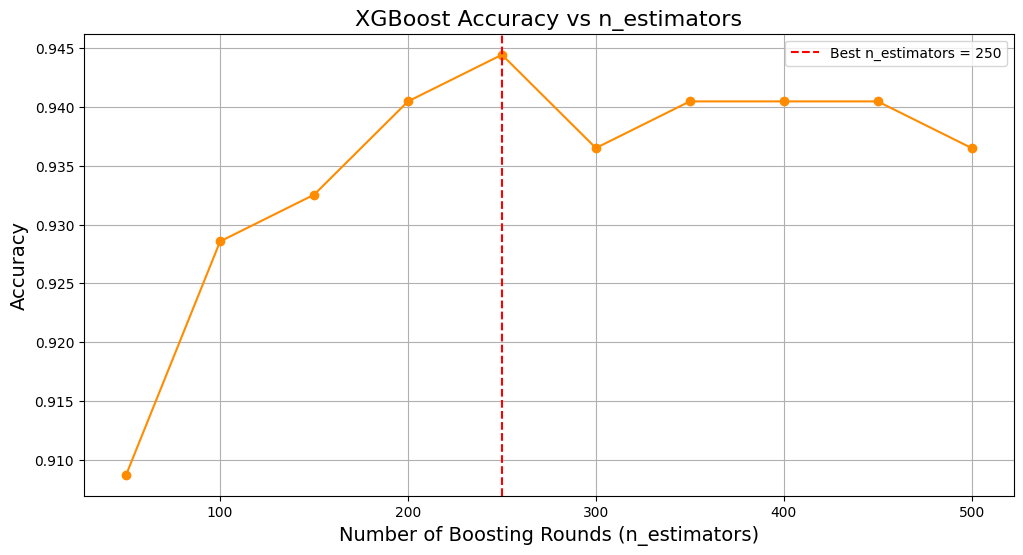

In [61]:
estimators = range(50, 501, 50)
accuracies = []

for n in estimators:
    xgb_clf = XGBClassifier(
        n_estimators=n,
        learning_rate=0.05,
        max_depth=7,
        subsample=0.8,
        colsample_bytree=0.8,
        objective="multi:softmax",
        num_class=len(y.unique()),
        random_state=42,
        eval_metric="mlogloss"
    )
    xgb_clf.fit(X_train, y_train)
    y_pred = xgb_clf.predict(X_test)
    acc = accuracy_score(y_test, y_pred)
    accuracies.append(acc)


best_acc = max(accuracies)
best_n = estimators[accuracies.index(best_acc)]
print(f"Best accuracy: {best_acc:.4f} at n_estimators = {best_n}")

plt.figure(figsize=(12,6))
plt.plot(estimators, accuracies, marker="o", linestyle="-", color="darkorange")
plt.axvline(best_n, color="red", linestyle="--", label=f"Best n_estimators = {best_n}")
plt.title("XGBoost Accuracy vs n_estimators", fontsize=16)
plt.xlabel("Number of Boosting Rounds (n_estimators)", fontsize=14)
plt.ylabel("Accuracy", fontsize=14)
plt.legend()
plt.grid(True)
plt.show()


In [62]:
xgb_clf = XGBClassifier(
    n_estimators=300,
    learning_rate=0.05,
    max_depth=7,
    subsample=0.8,
    colsample_bytree=0.8,
    objective="multi:softmax",
    num_class=len(y.unique()),
    random_state=42,
    eval_metric="mlogloss"
)
xgb_clf.fit(X_train, y_train)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=0.8, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric='mlogloss',
              feature_types=None, feature_weights=None, gamma=None,
              grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=0.05, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=7, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=300, n_jobs=None, num_class=4, ...)

In [63]:
XG_pred = xgb_clf.predict(X_test)
XG_pred

array([2, 1, 3, 3, 2, 1, 3, 0, 3, 1, 3, 0, 1, 2, 0, 3, 2, 1, 1, 2, 0, 1,
       0, 1, 2, 1, 3, 0, 0, 3, 1, 0, 2, 0, 0, 2, 1, 0, 0, 0, 0, 0, 3, 0,
       0, 1, 2, 0, 1, 1, 2, 2, 2, 1, 0, 3, 0, 1, 0, 2, 2, 3, 3, 3, 3, 1,
       3, 1, 0, 1, 1, 0, 2, 0, 1, 1, 3, 3, 2, 2, 1, 1, 2, 0, 3, 0, 1, 3,
       0, 2, 1, 3, 0, 3, 3, 1, 2, 0, 3, 1, 3, 3, 2, 1, 3, 1, 2, 3, 2, 0,
       2, 3, 2, 1, 3, 0, 0, 1, 3, 3, 1, 2, 3, 2, 3, 0, 0, 1, 2, 3, 3, 2,
       3, 1, 3, 1, 1, 0, 0, 1, 2, 1, 2, 0, 2, 3, 2, 0, 1, 2, 3, 2, 2, 1,
       0, 2, 1, 1, 2, 3, 3, 1, 1, 3, 3, 2, 1, 2, 2, 3, 1, 2, 1, 2, 3, 1,
       0, 3, 1, 2, 0, 0, 2, 0, 0, 0, 2, 2, 1, 3, 3, 1, 3, 1, 0, 3, 0, 1,
       3, 2, 3, 2, 0, 2, 1, 2, 0, 0, 0, 1, 0, 1, 2, 2, 3, 2, 0, 0, 3, 3,
       2, 3, 3, 2, 1, 1, 3, 3, 3, 0, 1, 1, 1, 1, 2, 1, 0, 2, 0, 3, 3, 0,
       2, 0, 3, 3, 3, 2, 3, 1, 2, 0], dtype=int32)

In [64]:
print("Confusion Matrix:\n", confusion_matrix(y_test, XG_pred))
print("\nClassification Report:\n", classification_report(y_test, XG_pred))

Confusion Matrix:
 [[59  0  1  5]
 [ 0 60  1  2]
 [ 0  2 58  0]
 [ 1  3  1 59]]

Classification Report:
               precision    recall  f1-score   support

           0       0.98      0.91      0.94        65
           1       0.92      0.95      0.94        63
           2       0.95      0.97      0.96        60
           3       0.89      0.92      0.91        64

    accuracy                           0.94       252
   macro avg       0.94      0.94      0.94       252
weighted avg       0.94      0.94      0.94       252



# Comaprison / Best Model

In [65]:
print("Random Forest:\n")
print("Confusion Matrix:\n", confusion_matrix(y_test, rf_pred))
print("\nClassification Report:\n",'\n', classification_report(y_test, rf_pred))

print('Gradient Boost:\n')
print("Confusion Matrix:\n", confusion_matrix(y_test, gb_pred))
print("\nClassification Report:\n", classification_report(y_test, gb_pred))

print('XGBoost:\n')
print("Confusion Matrix:\n", confusion_matrix(y_test, XG_pred))
print("\nClassification Report:\n", classification_report(y_test, XG_pred))

Random Forest:

Confusion Matrix:
 [[58  0  1  6]
 [ 0 62  1  0]
 [ 0  0 60  0]
 [ 2  3  1 58]]

Classification Report:
 
               precision    recall  f1-score   support

           0       0.97      0.89      0.93        65
           1       0.95      0.98      0.97        63
           2       0.95      1.00      0.98        60
           3       0.91      0.91      0.91        64

    accuracy                           0.94       252
   macro avg       0.94      0.95      0.94       252
weighted avg       0.94      0.94      0.94       252

Gradient Boost:

Confusion Matrix:
 [[60  0  1  4]
 [ 0 60  2  1]
 [ 0  1 59  0]
 [ 1  1  1 61]]

Classification Report:
               precision    recall  f1-score   support

           0       0.98      0.92      0.95        65
           1       0.97      0.95      0.96        63
           2       0.94      0.98      0.96        60
           3       0.92      0.95      0.94        64

    accuracy                           0.95     

In [66]:
print('The Final best accuracy is recieved by gradient boost which is 95.24 %')

The Final best accuracy is recieved by gradient boost which is 95.24 %


In [67]:
sample = np.array([[7.02	,10.0	,9.0	,8.0	,26.0]])
sample_pred=gb_clf.predict(sample)

if sample_pred == 0:
    print("Green zone")
elif sample_pred == 3:
    print("Yellow zone")
elif sample_pred == 1:
    print("Orange zone")
elif sample_pred == 2:
    print("Red zone")
else:
    print("Unknown prediction:", sample_pred)



Orange zone


In [68]:
import joblib

**Reasoning**:
The next instruction is to use `joblib.dump()` to save the `gb_clf` model to a file named 'gradient_boosting_model.pkl'.



In [69]:
joblib.dump(gb_clf, 'gradient_boosting_model.pkl')
print("Gradient Boosting Classifier model saved as 'gradient_boosting_model.pkl'")

Gradient Boosting Classifier model saved as 'gradient_boosting_model.pkl'


In [70]:
!pip install skl2onnx onnxruntime

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 315.5/315.5 kB 7.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 17.4/17.4 MB 107.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 18.1/18.1 MB 106.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 46.0/46.0 kB 5.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 86.8/86.8 kB 11.3 MB/s eta 0:00:00


In [71]:
from skl2onnx import convert_sklearn
from skl2onnx.common.data_types import FloatTensorType

initial_type = [('float_input', FloatTensorType([None, X_train.shape[1]]))]
print("Necessary skl2onnx modules imported and initial types defined.")

Necessary skl2onnx modules imported and initial types defined.


In [72]:
onnx_model = convert_sklearn(gb_clf, initial_types=initial_type)
print("Gradient Boosting Classifier model converted to ONNX format.")

Gradient Boosting Classifier model converted to ONNX format.


In [74]:
import onnx
onnx.save_model(onnx_model, 'gradient_boosting_model.onnx')
print("ONNX model saved as 'gradient_boosting_model.onnx'")

ONNX model saved as 'gradient_boosting_model.onnx'
